<a href="https://colab.research.google.com/github/haryadi14/Appdata/blob/master/Intership1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DdOS Detection Using Machine Learning and Model Comparassion**

In [1]:
# module imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import random

# processing imports
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,f1_score,recall_score

from sklearn import metrics
from sklearn import svm



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **I. Data Collecting**



In [3]:
dataset = pd.read_csv('drive/MyDrive/UDP.csv')

<ipython-input-3-d3aec38396ff>:1: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('drive/MyDrive/UDP.csv')


In [4]:
dataset.head()

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,15798,172.16.0.5-192.168.50.4-9401-15931-17,172.16.0.5,9401,192.168.50.4,15931,17,2018-11-03 10:42:57.176671,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,MSSQL
1,110891,172.16.0.5-192.168.50.4-9402-29997-17,172.16.0.5,9402,192.168.50.4,29997,17,2018-11-03 10:42:57.176673,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,MSSQL
2,66956,172.16.0.5-192.168.50.4-9403-29887-17,172.16.0.5,9403,192.168.50.4,29887,17,2018-11-03 10:42:57.176727,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,MSSQL
3,66144,172.16.0.5-192.168.50.4-9404-7393-17,172.16.0.5,9404,192.168.50.4,7393,17,2018-11-03 10:42:57.176729,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,MSSQL
4,72903,172.16.0.5-192.168.50.4-9405-57957-17,172.16.0.5,9405,192.168.50.4,57957,17,2018-11-03 10:42:57.177121,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,MSSQL


In [5]:
dataset[" Label"].unique()

array(['MSSQL', 'BENIGN', 'UDP'], dtype=object)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3782206 entries, 0 to 3782205
Data columns (total 88 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Unnamed: 0                    int64  
 1   Flow ID                       object 
 2    Source IP                    object 
 3    Source Port                  int64  
 4    Destination IP               object 
 5    Destination Port             int64  
 6    Protocol                     int64  
 7    Timestamp                    object 
 8    Flow Duration                int64  
 9    Total Fwd Packets            int64  
 10   Total Backward Packets       int64  
 11  Total Length of Fwd Packets   float64
 12   Total Length of Bwd Packets  float64
 13   Fwd Packet Length Max        float64
 14   Fwd Packet Length Min        float64
 15   Fwd Packet Length Mean       float64
 16   Fwd Packet Length Std        float64
 17  Bwd Packet Length Max         float64
 18   Bwd Packet Length Min

# **II. Data Prerocessing**

Label Encoders

In [7]:
dataset[" Label"].value_counts()

UDP       3754680
MSSQL       24392
BENIGN       3134
Name:  Label, dtype: int64

In [8]:
is_attack = dataset[" Label"].map(lambda a: 0 if a == 'BENIGN' else 1)

In [9]:
is_attack.value_counts()

1    3779072
0       3134
Name:  Label, dtype: int64

In [10]:

is_attack

0          1
1          1
2          1
3          1
4          1
          ..
3782201    1
3782202    1
3782203    1
3782204    1
3782205    1
Name:  Label, Length: 3782206, dtype: int64

In [11]:
dataset[' Label'] = is_attack

<Axes: ylabel='count'>

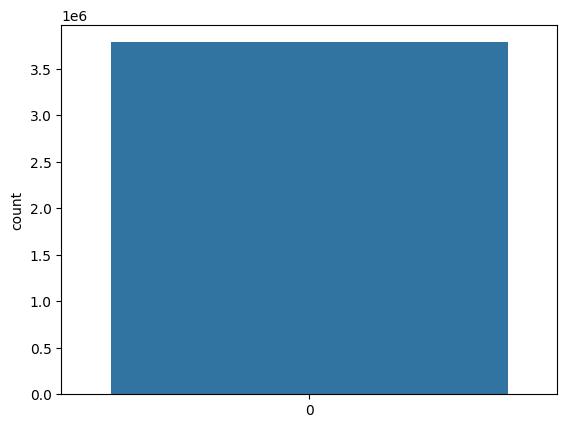

In [12]:
label_dict = dict(is_attack.value_counts())
sns.countplot(is_attack)

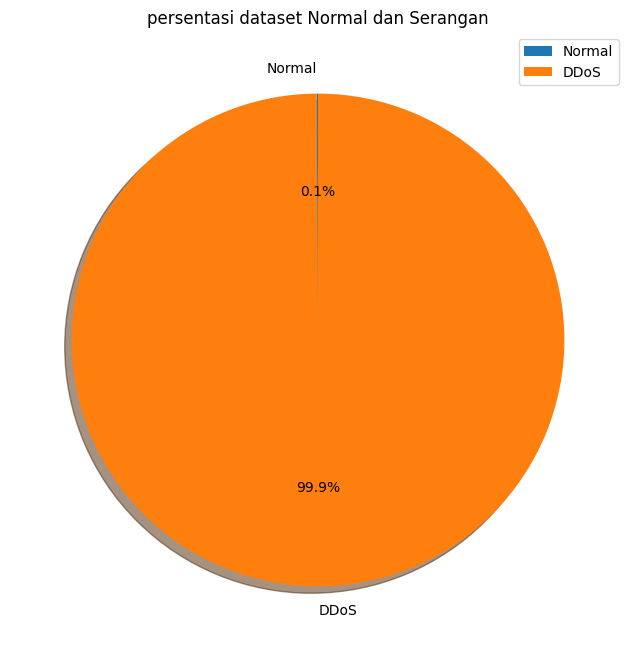

In [13]:
labels = ["Normal",'DDoS']
sizes = [dict(is_attack.value_counts())[0], dict(is_attack.value_counts())[1]]
plt.figure(figsize = (13,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.legend(["Normal", "DDoS"])
plt.title('persentasi dataset Normal dan Serangan')
plt.show()

In [14]:
dataset.describe()

,Unnamed: 0,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound,Label
count,3.782206e+06,3.782206e+06,3.782206e+06,3.782206e+06,3.782206e+06,3.782206e+06,3.782206e+06,3.782206e+06,3.782206e+06,3.782206e+06,...,3.782206e+06,3.782206e+06,3.782206e+06,3.782206e+06,3.782206e+06,3.782206e+06,3.782206e+06,3.782206e+06,3.782206e+06,3.782206e+06
mean,6.314332e+04,4.679348e+04,3.330075e+04,1.699230e+01,9.054014e+04,3.749488e+00,7.763723e-03,1.362059e+03,5.805188e+00,3.881425e+02,...,7.549161e+01,2.851830e+01,1.207670e+02,5.850962e+01,2.400031e+03,1.250781e+02,2.517102e+03,2.292068e+03,9.990566e-01,9.991714e-01
std,3.657531e+04,8.424700e+03,1.865294e+04,2.965105e-01,7.661436e+05,3.573937e+00,1.442430e+00,1.201260e+03,2.216302e+03,3.095188e+01,...,1.598006e+04,8.481062e+03,2.363565e+04,1.464551e+04,3.039307e+05,6.037865e+04,3.197172e+05,2.964808e+05,3.069976e-02,2.877378e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.151800e+04,3.985400e+04,1.721100e+04,1.700000e+01,1.000000e+00,2.000000e+00,0.000000e+00,7.660000e+02,0.000000e+00,3.750000e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
50%,6.303600e+04,4.690800e+04,3.328800e+04,1.700000e+01,5.100000e+01,2.000000e+00,0.000000e+00,1.146000e+03,0.000000e+00,3.890000e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
75%,9.455500e+04,5.389900e+04,4.948300e+04,1.700000e+01,1.087730e+05,4.000000e+00,0.000000e+00,1.438000e+03,0.000000e+00,3.930000e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
max,1.323170e+05,6.553100e+04,6.553500e+04,1.700000e+01,1.199956e+08,9.220000e+02,1.347000e+03,1.024720e+05,2.466308e+06,3.495000e+03,...,1.086388e+07,8.246154e+06,1.613015e+07,1.086388e+07,1.157254e+08,6.188006e+07,1.157254e+08,1.157254e+08,1.000000e+00,1.000000e+00


In [15]:
dataset.head()

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,15798,172.16.0.5-192.168.50.4-9401-15931-17,172.16.0.5,9401,192.168.50.4,15931,17,2018-11-03 10:42:57.176671,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1
1,110891,172.16.0.5-192.168.50.4-9402-29997-17,172.16.0.5,9402,192.168.50.4,29997,17,2018-11-03 10:42:57.176673,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1
2,66956,172.16.0.5-192.168.50.4-9403-29887-17,172.16.0.5,9403,192.168.50.4,29887,17,2018-11-03 10:42:57.176727,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1
3,66144,172.16.0.5-192.168.50.4-9404-7393-17,172.16.0.5,9404,192.168.50.4,7393,17,2018-11-03 10:42:57.176729,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1
4,72903,172.16.0.5-192.168.50.4-9405-57957-17,172.16.0.5,9405,192.168.50.4,57957,17,2018-11-03 10:42:57.177121,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1


# **III. Missing Value Identification**

Text(0.5, 1.0, 'Features which has NuLL values')

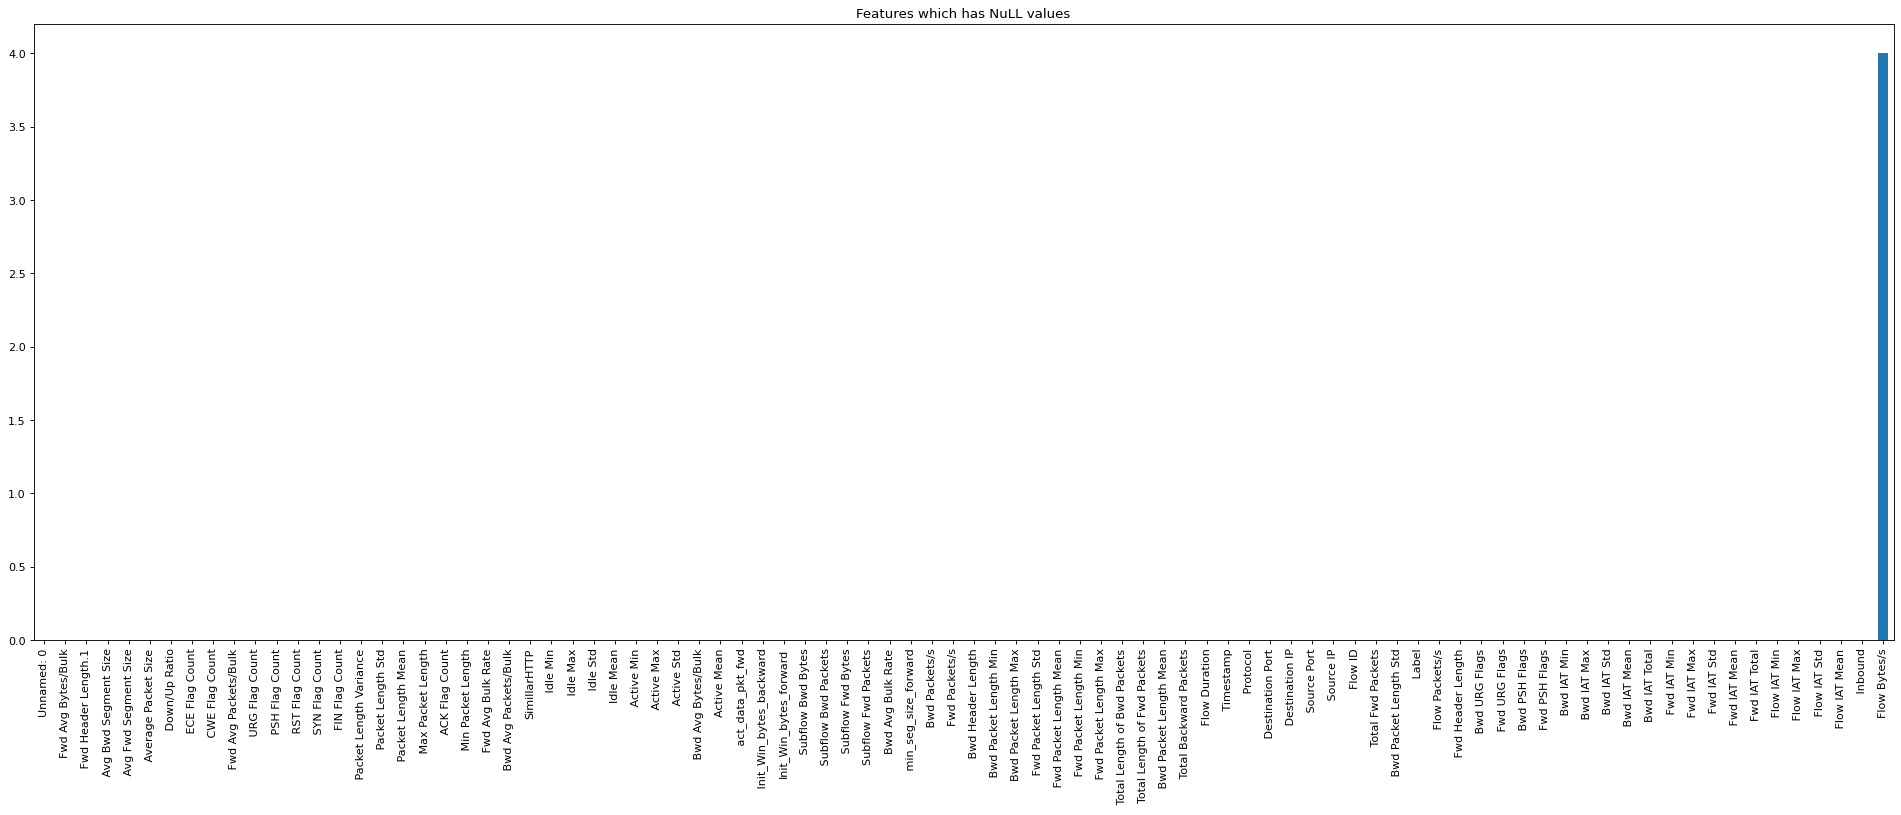

In [16]:
# Kita akan melihat data dengan NaN dengan visualisasi agar lebih nyaman
plt.figure(figsize=(30, 10), dpi=80)
dataset[dataset.columns[dataset.isna().sum() >= 0]].isna().sum().sort_values().plot.bar()
plt.title("Features which has NuLL values")

In [17]:
dataset.fillna(0)
dataset["Flow Bytes/s"].isna().sum()

4

In [18]:
dataset.isnull().sum()

Unnamed: 0         0
Flow ID            0
 Source IP         0
 Source Port       0
 Destination IP    0
                  ..
 Idle Max          0
 Idle Min          0
SimillarHTTP       0
 Inbound           0
 Label             0
Length: 88, dtype: int64

# **IV. Feature Selection**

In [19]:
korelasi = dataset.corr(method='kendall')

kor_target = abs(korelasi[' Label'])
feature = kor_target[kor_target > 0.70]
print(feature)

<ipython-input-19-84df1d039633>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  korelasi = dataset.corr(method='kendall')


 Protocol                       0.837225
 Total Backward Packets         0.827654
 Total Length of Bwd Packets    0.764040
Bwd Packet Length Max           0.764043
 Bwd Packet Length Mean         0.764043
Bwd IAT Total                   0.804131
 Bwd IAT Mean                   0.804131
 Bwd IAT Max                    0.804132
 Bwd IAT Min                    0.769764
 Bwd Header Length              0.829703
 Bwd Packets/s                  0.827424
 URG Flag Count                 0.728954
 Down/Up Ratio                  0.722060
 Avg Bwd Segment Size           0.764043
 Subflow Bwd Packets            0.827654
 Subflow Bwd Bytes              0.764040
Init_Win_bytes_forward          0.826482
 Inbound                        0.739611
 Label                          1.000000
Name:  Label, dtype: float64


In [20]:
!pip install imbalanced-learn

In [21]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

In [22]:
dataset.columns

Index(['Unnamed: 0', 'Flow ID', ' Source IP', ' Source Port',
       ' Destination IP', ' Destination Port', ' Protocol', ' Timestamp',
       ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Len

In [23]:
x1 = dataset[[
    ' Destination Port', ' Flow Duration', ' Fwd Packet Length Min', 'Flow Bytes/s', ' Flow IAT Min' ,' Bwd Header Length', ' Bwd Packets/s', ' Min Packet Length', ' Subflow Bwd Packets', ' Init_Win_bytes_backward']]
x1

,Destination Port,Flow Duration,Fwd Packet Length Min,Flow Bytes/s,Flow IAT Min,Bwd Header Length,Bwd Packets/s,Min Packet Length,Subflow Bwd Packets,Init_Win_bytes_backward
0,15931,1,1280.0,2.560000e+09,1.0,0,0.0,1280.0,0,-1
1,29997,0,408.0,inf,0.0,0,0.0,408.0,0,-1
2,29887,1,405.0,8.100000e+08,1.0,0,0.0,405.0,0,-1
3,7393,1,426.0,8.520000e+08,1.0,0,0.0,426.0,0,-1
4,57957,1,620.0,1.240000e+09,1.0,0,0.0,620.0,0,-1
...,...,...,...,...,...,...,...,...,...,...
3782201,39817,1,330.0,6.600000e+08,1.0,0,0.0,330.0,0,-1
3782202,36358,2,321.0,3.210000e+08,2.0,0,0.0,321.0,0,-1
3782203,40307,1,383.0,7.660000e+08,1.0,0,0.0,383.0,0,-1
3782204,43637,2,383.0,3.830000e+08,2.0,0,0.0,383.0,0,-1


In [24]:
y1 = dataset[[" Label"]]

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(x1, y1, test_size=0.2, random_state=0)

In [26]:
X_test = X_test.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [27]:
X_train = X_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [28]:
print("data Train set:", X_train.shape, Y_train.shape)
print("data Test set:", X_test.shape, Y_test.shape)

data Train set: (3025764, 10) (3025764, 1)
data Test set: (756442, 10) (756442, 1)


In [29]:
oversample = SMOTE(random_state=42)
X_smote, y_smote = oversample.fit_resample(X_train, Y_train)

In [30]:
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X_train, Y_train)

In [31]:
print("data Train set:", X_ros.shape, y_ros.shape)


data Train set: (6046504, 10) (6046504, 1)


In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [33]:
def plot_2d_space(X, y, label='Classes'):
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

<Axes: ylabel='count'>

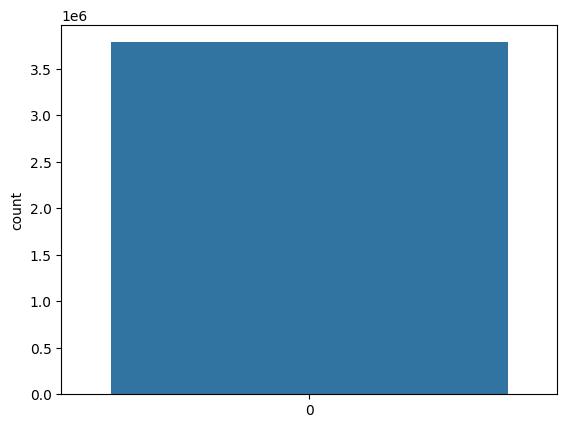

In [34]:
label_dict = dict(y_ros.value_counts())
sns.countplot(is_attack)

In [35]:
y_ros

,Label
0,1
1,1
2,1
3,1
4,1
...,...
6046499,0
6046500,0
6046501,0
6046502,0


In [36]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [37]:
X_train

array([[-1.68775964, -0.12092638,  0.96433518, ...,  0.96434098,
        -0.00523314, -0.00732002],
       [ 0.57674217, -0.12092638,  0.35977833, ...,  0.35980107,
        -0.00523314, -0.00732002],
       [-1.19057583,  0.02495625, -0.68657007, ..., -0.68651801,
        -0.00523314, -0.00732002],
       ...,
       [-0.36536648, -0.12092638,  0.54579582, ...,  0.54581335,
        -0.00523314, -0.00732002],
       [ 0.48626715,  0.02206706, -0.68657007, ..., -0.68651801,
        -0.00523314, -0.00732002],
       [ 1.14456938, -0.08817643, -1.98869253, ..., -1.98860397,
        -0.00523314, -0.00732002]])

In [38]:
pca = PCA(n_components=2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_

In [39]:
# Import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Create Random Forest Classifier object and call fit function to train the model
clf = RandomForestClassifier()

In [40]:
# model for the binary classification
clf.fit(X_train, Y_train)
binary_predictions = clf.predict(X_test)


<ipython-input-40-1e226d2b3512>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, Y_train)


In [41]:
# calculate and display our base accuracty
base_rf_score = accuracy_score(binary_predictions,Y_test)
base_rf_score

0.9999775263668595

DATASET KITA

In [42]:
datakita_normal = pd.read_csv("drive/MyDrive/normal_baru.csv")
datakita_serang = pd.read_csv("drive/MyDrive/serangan_pcap.csv")

In [43]:
datakita_normal

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,10.0.0.1-10.0.0.3-0-0-0,10.0.0.3,0,10.0.0.1,0,0,22/12/2022 10:57:56 AM,57343775,56,58,...,0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,No Label
1,8.0.6.4-8.6.0.1-0-0-0,8.6.0.1,0,8.0.6.4,0,0,22/12/2022 10:58:18 AM,32767588,4,1,...,0,3.839156e+06,0.000000e+00,3839156.0,3839156.0,9.642811e+06,4.473736e+06,14592446.0,5887310.0,No Label
2,10.0.0.1-10.0.0.4-0-0-0,10.0.0.4,0,10.0.0.1,0,0,22/12/2022 10:57:56 AM,57344044,56,58,...,0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,No Label
3,10.0.0.1-10.0.0.3-0-0-0,10.0.0.3,0,10.0.0.1,0,0,22/12/2022 10:53:54 AM,119808035,117,119,...,0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,No Label
4,10.0.0.1-10.0.0.4-0-0-0,10.0.0.4,0,10.0.0.1,0,0,22/12/2022 10:53:54 AM,119808089,117,119,...,0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,No Label
5,8.0.6.4-8.6.0.1-0-0-0,8.6.0.1,0,8.0.6.4,0,0,22/12/2022 10:54:08 AM,114431711,12,1,...,0,4.608079e+06,1.330624e+06,6144551.0,3839639.0,1.257593e+07,5.827158e+06,22271793.0,5888345.0,No Label
6,10.0.0.1-10.0.0.3-0-0-0,10.0.0.3,0,10.0.0.1,0,0,22/12/2022 10:55:55 AM,119807887,117,119,...,0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,No Label
7,10.0.0.1-10.0.0.4-0-0-0,10.0.0.4,0,10.0.0.1,0,0,22/12/2022 10:55:55 AM,119808050,117,119,...,0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,No Label
8,8.0.6.4-8.6.0.1-0-0-0,8.6.0.1,0,8.0.6.4,0,0,22/12/2022 10:56:11 AM,114431319,13,1,...,0,5.972399e+06,1.469598e+05,6142093.0,5887303.0,1.544568e+07,6.397698e+06,24832371.0,7938096.0,No Label


In [44]:
datakita_normal["Label"] = datakita_normal["Label"].replace(['No Label'], 0)
datakita_serang["Label"] = datakita_serang["Label"].replace(['No Label'], 1)

In [45]:
datakita = pd.concat([datakita_normal, datakita_serang]).drop_duplicates().reset_index(drop=True)

In [46]:
datakita['Label'].value_counts()

1    219348
0         9
Name: Label, dtype: int64

In [47]:
datakita.columns

Index(['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
       'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE 

In [48]:
datakita

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,10.0.0.1-10.0.0.3-0-0-0,10.0.0.3,0,10.0.0.1,0,0,22/12/2022 10:57:56 AM,57343775,56,58,...,0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0
1,8.0.6.4-8.6.0.1-0-0-0,8.6.0.1,0,8.0.6.4,0,0,22/12/2022 10:58:18 AM,32767588,4,1,...,0,3839156.0,0.0,3839156.0,3839156.0,9.642811e+06,4.473736e+06,14592446.0,5887310.0,0
2,10.0.0.1-10.0.0.4-0-0-0,10.0.0.4,0,10.0.0.1,0,0,22/12/2022 10:57:56 AM,57344044,56,58,...,0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0
3,10.0.0.1-10.0.0.3-0-0-0,10.0.0.3,0,10.0.0.1,0,0,22/12/2022 10:53:54 AM,119808035,117,119,...,0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0
4,10.0.0.1-10.0.0.4-0-0-0,10.0.0.4,0,10.0.0.1,0,0,22/12/2022 10:53:54 AM,119808089,117,119,...,0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219352,10.0.0.1-10.0.0.2-80-46116-6,10.0.0.2,46116,10.0.0.1,80,6,22/12/2022 10:08:57 AM,113224477,1,3,...,0,21.0,0.0,21.0,21.0,1.132244e+08,0.000000e+00,113224436.0,113224436.0,1
219353,10.0.0.1-10.0.0.2-80-46117-6,10.0.0.2,46117,10.0.0.1,80,6,22/12/2022 10:08:57 AM,113224485,1,3,...,0,16.0,0.0,16.0,16.0,1.132245e+08,0.000000e+00,113224452.0,113224452.0,1
219354,10.0.0.1-10.0.0.2-80-46118-6,10.0.0.2,46118,10.0.0.1,80,6,22/12/2022 10:08:57 AM,113224466,1,3,...,0,19.0,0.0,19.0,19.0,1.132244e+08,0.000000e+00,113224428.0,113224428.0,1
219355,10.0.0.1-10.0.0.2-80-46119-6,10.0.0.2,46119,10.0.0.1,80,6,22/12/2022 10:08:57 AM,113224460,1,3,...,0,20.0,0.0,20.0,20.0,1.132244e+08,0.000000e+00,113224424.0,113224424.0,1


In [49]:
X_predict_2 =  datakita[['Dst Port', 'Flow Duration', 'Fwd Pkt Len Min', 'Flow Byts/s', 'Flow IAT Min' ,'Bwd Header Len', 'Bwd Pkts/s', 'Pkt Len Min', 'Subflow Bwd Pkts', 'Init Bwd Win Byts']]
X_predict_2 = X_predict_2.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [50]:
X_predict_2.shape

(219357, 10)

In [51]:
X_predict_flow_2 = StandardScaler().fit(X_predict_2).transform(X_predict_2.astype('float64'))

X_predict_flow_2 = PCA(n_components=2).fit_transform(X_predict_flow_2)

In [52]:
X_predict_flow_2.shape

(219357, 2)

In [53]:
Y_predict_flow_2 = datakita['Label'].values
Y_predict_flow_2

array([0, 0, 0, ..., 1, 1, 1])

In [54]:
new_output = clf.predict(X_predict_flow_2)


In [55]:
# calculate and display our base accuracty
base_rf_score = accuracy_score(new_output,Y_predict_flow_2)
base_rf_score

0.9999863236641638

In [56]:
print("acccuracy score :",(accuracy_score(new_output,Y_predict_flow_2))*100,"%")
print("precision score :",(precision_score(new_output,Y_predict_flow_2))*100,"%")
print("Recall score :",(recall_score(new_output,Y_predict_flow_2))*100,"%")
print("f1 score :",(f1_score(new_output,Y_predict_flow_2))*100,"%")

acccuracy score : 99.99863236641639 %
precision score : 99.99863231030145 %
Recall score : 100.0 %
f1 score : 99.99931615047424 %


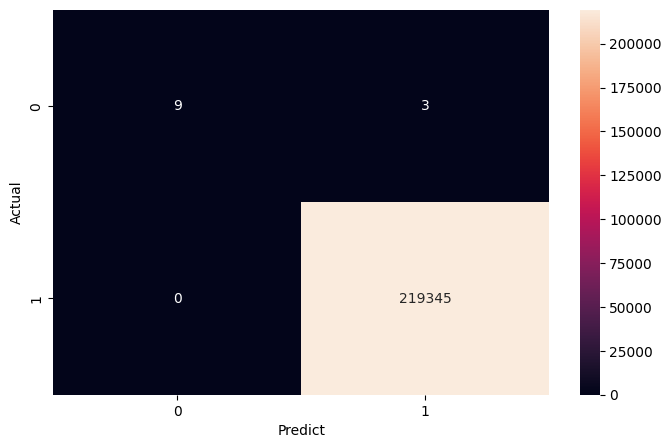

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(new_output,Y_predict_flow_2), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Predict")
plt.ylabel("Actual")
plt.show()

DATASET kanntor

In [58]:
datakantor_normal = pd.read_csv("drive/MyDrive/Normal_generate6.csv")
datakantor_ICMP = pd.read_csv("drive/MyDrive/capture_h3_ICMP_Flow.csv")
datakantor_TCP = pd.read_csv("drive/MyDrive/capture_h3_TCP-SYN.pcap_Flow.csv")
datakantor_UDP = pd.read_csv("drive/MyDrive/capture_h3_UDP.pcap_Flow.csv")


In [59]:
datakantor_UDP.Label

0        No Label
1        No Label
2        No Label
3        No Label
4        No Label
           ...   
65531    No Label
65532    No Label
65533    No Label
65534    No Label
65535    No Label
Name: Label, Length: 65536, dtype: object

In [60]:
map_normal = {
    'No Label': np.int64(0),
    }
map_serangan = {
    'No Label': np.int64(1),
    }

In [61]:
datakantor_normal['Label'] = datakantor_normal['Label'].map(map_normal)
datakantor_ICMP['Label'] = datakantor_ICMP['Label'].map(map_serangan)
datakantor_TCP['Label'] = datakantor_TCP['Label'].map(map_serangan)
datakantor_UDP['Label'] = datakantor_UDP['Label'].map(map_serangan)

In [62]:
datakantor_ICMP

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,10.0.0.1-10.0.0.2-55884-443-17,10.0.0.1,55884,10.0.0.2,443,17,23/09/2020 04:59:17 AM,119814131,10340,1,...,0,1.002989e+08,0.000000e+00,100298930.0,100298930.0,6766644.0,0.000000e+00,6766644.0,6766644.0,1
1,10.0.0.1-10.0.0.2-55884-443-17,10.0.0.1,55884,10.0.0.2,443,17,23/09/2020 05:01:21 AM,80140136,8216,1,...,0,5.481579e+06,3.966578e+06,9453787.0,318438.0,6557856.0,2.196578e+06,9839598.0,5195059.0,1


In [63]:
datakantor = pd.concat([datakantor_normal, datakantor_ICMP, datakantor_TCP, datakantor_UDP]).drop_duplicates().reset_index(drop=True)

In [64]:
datakantor["Label"].value_counts()

1    131074
0     23459
Name: Label, dtype: int64

In [65]:
X_predict_3 = datakantor[['Dst Port', 'Flow Duration', 'Fwd Pkt Len Min', 'Flow Byts/s', 'Flow IAT Min' ,'Bwd Header Len', 'Bwd Pkts/s', 'Pkt Len Min', 'Subflow Bwd Pkts', 'Init Bwd Win Byts']]
X_predict_3 = X_predict_3.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [66]:
X_predict_flow_3 = StandardScaler().fit(X_predict_3).transform(X_predict_3.astype('float64'))

X_predict_flow_3 = PCA(n_components=2).fit_transform(X_predict_flow_3)

In [67]:
Y_predict_flow_3 = datakantor['Label'].values
Y_predict_flow_3

array([0, 0, 0, ..., 1, 1, 1])

In [68]:
new_output_3 = clf.predict(X_predict_flow_3)
base_rf_score_3 = accuracy_score(new_output_3,Y_predict_flow_3)
base_rf_score_3


0.8488348766930041

In [69]:
print("acccuracy score :",(accuracy_score(new_output_3,Y_predict_flow_3))*100,"%")
print("precision score :",(precision_score(new_output_3,Y_predict_flow_3))*100,"%")
print("Recall score :",(recall_score(new_output_3,Y_predict_flow_3))*100,"%")
print("Recall score :",(confusion_matrix(Y_predict_flow_3,new_output_3)))
print("f1 score :",(f1_score(new_output_3,Y_predict_flow_3))*100,"%")

acccuracy score : 84.88348766930041 %
precision score : 99.99847414437646 %
Recall score : 84.87470051155863 %
Recall score : [[   101  23358]
 [     2 131072]]
f1 score : 91.81797803183143 %


In [70]:
new_output_3

array([1, 1, 1, ..., 1, 1, 1])

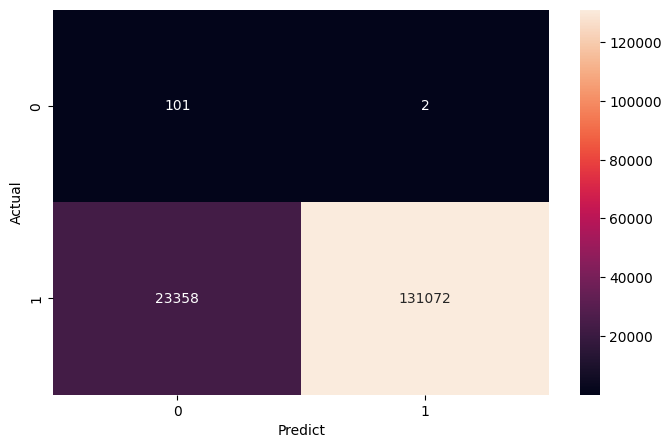

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(new_output_3,Y_predict_flow_3), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Predict")
plt.ylabel("Actual")
plt.show()